In [96]:
import numpy as np

In [97]:
import random

In [98]:
vertexes = np.arange(1, 41)
vertexes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [99]:
modules = {i: [] for i in range(1, 5)}
for vertex in vertexes:
    modul_number = np.random.randint(1, 5)
    modules[modul_number].append(vertex)

modules

{1: [3, 5, 11, 13, 14, 29, 30, 33],
 2: [4, 6, 8, 24, 26, 27, 35, 37, 39, 40],
 3: [9, 10, 16, 19, 20, 21, 25, 31, 32],
 4: [1, 2, 7, 12, 15, 17, 18, 22, 23, 28, 34, 36, 38]}

In [100]:
STEPS = 500
pw = 0.95
pm = 0.01
connections = []

In [101]:
for _ in range(STEPS):
       
    n1, n2 = np.random.randint(1, 41, 2)
    if n1 == n2:
        continue
    print(n1, n2)
    
    common_module = False
    for nr, module in modules.items():
        if set([n1, n2]).issubset(set(module)):
            common_module = True
    print(f"Czy wspolny modul: {common_module}")
    p_conn = np.random.uniform()
    print(p_conn)
    if common_module:
        if p_conn < pw:
            connections.append((n1, n2))
    else:
        if p_conn < pm:
            connections.append((n1, n2))

39 6
Czy wspolny modul: True
0.24443663158497164
6 25
Czy wspolny modul: False
0.06592326057410658
38 30
Czy wspolny modul: False
0.45384859908358943
40 11
Czy wspolny modul: False
0.25686112436352626
7 26
Czy wspolny modul: False
0.7645132720514708
12 23
Czy wspolny modul: True
0.7610762395545689
20 27
Czy wspolny modul: False
0.5181006161005488
11 17
Czy wspolny modul: False
0.42093696729472574
35 32
Czy wspolny modul: False
0.4837315204527618
19 2
Czy wspolny modul: False
0.17198041837176214
34 20
Czy wspolny modul: False
0.07867511613182154
7 20
Czy wspolny modul: False
0.7350901762290017
22 13
Czy wspolny modul: False
0.7683817421985636
27 32
Czy wspolny modul: False
0.957480749342013
9 23
Czy wspolny modul: False
0.4123796551601149
20 31
Czy wspolny modul: True
0.11649122266744805
13 39
Czy wspolny modul: False
0.8708065392436222
7 16
Czy wspolny modul: False
0.7184893125505087
26 38
Czy wspolny modul: False
0.0673664320341748
31 21
Czy wspolny modul: True
0.3826325486382771
16 2

In [102]:
colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'orange'}
node_colors = [colors[nr] for vertex in vertexes for nr, module in modules.items() if vertex in module] 

In [103]:
node_colors

['orange',
 'orange',
 'red',
 'blue',
 'red',
 'blue',
 'orange',
 'blue',
 'green',
 'green',
 'red',
 'orange',
 'red',
 'red',
 'orange',
 'green',
 'orange',
 'orange',
 'green',
 'green',
 'green',
 'orange',
 'orange',
 'blue',
 'green',
 'blue',
 'blue',
 'orange',
 'red',
 'red',
 'green',
 'green',
 'red',
 'orange',
 'blue',
 'orange',
 'blue',
 'orange',
 'blue',
 'blue']

In [104]:
options = {
    'node_color': node_colors,
    'node_size': 1000,
    'width': 2,
    'edgecolors': 'black'
}

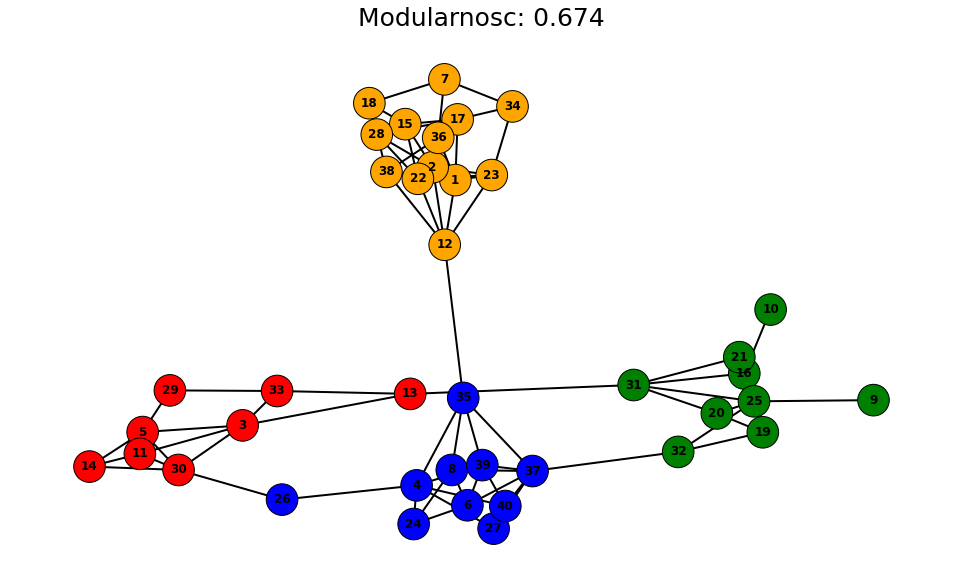

In [110]:
import networkx as nx
import networkx.algorithms.community as nac
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(17, 10))
G = nx.Graph()
G.add_nodes_from(vertexes)
G.add_edges_from(connections)
pos = nx.spring_layout(G)
axes.set_title(f"Modularnosc: {round(nac.modularity(G, list(modules.values())), 3)}", fontsize=25)
nx.draw(G, pos, with_labels=True, font_weight='bold', ax=axes, **options)
plt.show()